In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams["axes.labelsize"]=18
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [10]:
train = pd.read_csv('C:\\Users\\user\\Desktop\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('C:\\Users\\user\\Desktop\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('C:\\Users\\user\\Desktop\\financial-inclusion-in-africa\\SampleSubmission.csv')
variable= pd.read_csv('C:\\Users\\user\\Desktop\\financial-inclusion-in-africa\\VariableDefinitions.csv')



In [11]:
print('train data shape :',train.shape)
print('train data shape :',test.shape)
print("ss data shape",ss.shape)

train data shape : (23524, 13)
train data shape : (10086, 12)
ss data shape (33610, 2)


In [12]:
train.shape
test.shape

(10086, 12)

In [13]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [14]:
train.head(12)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [15]:
print("missing values:",train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


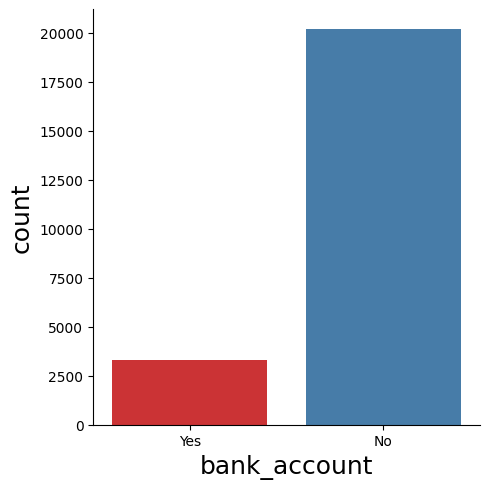

In [16]:
sns.catplot(x="bank_account", kind="count", data=train, palette="Set1")
plt.show()

In [17]:
ss.tail()

,unique_id,bank_account
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0
33609,uniqueid_3002 x Uganda,0


In [18]:
ss.tail(10)

,unique_id,bank_account
33600,uniqueid_2993 x Uganda,0
33601,uniqueid_2994 x Uganda,0
33602,uniqueid_2995 x Uganda,0
33603,uniqueid_2996 x Uganda,0
33604,uniqueid_2997 x Uganda,0
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0
33609,uniqueid_3002 x Uganda,0


In [19]:
ss.head()

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0


In [20]:
Variable.T

NameError: name 'Variable' is not defined

In [ ]:
variable.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [ ]:
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

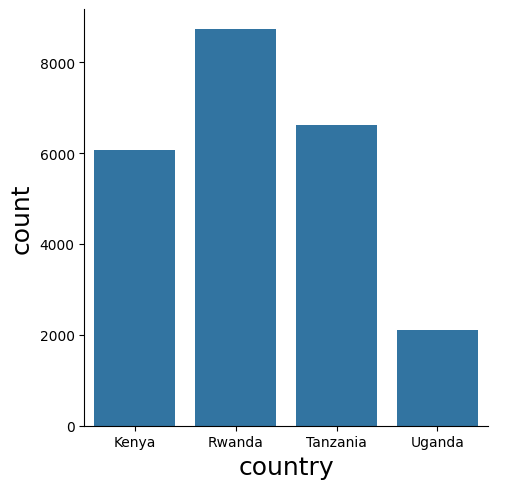

In [ ]:
sns.catplot(x="country",kind="count",data=train)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

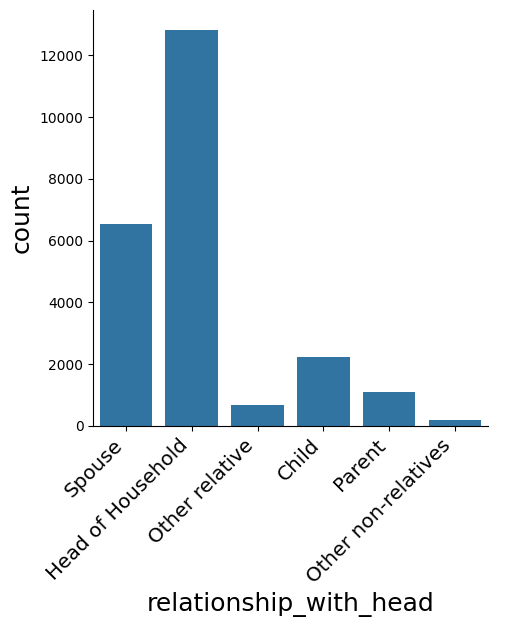

In [ ]:
sns.catplot(x="relationship_with_head",kind="count",data=train)

plt.xticks(
    rotation=45,
    horizontalalignment="right",
    fontweight="light",
    fontsize="x-large"
)

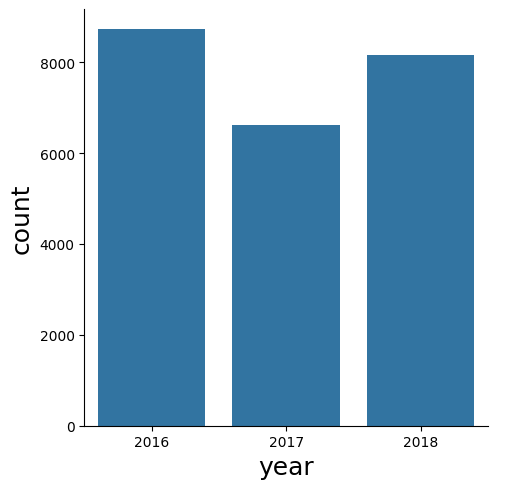

In [23]:
sns.catplot(x="year",kind="count",data=train)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

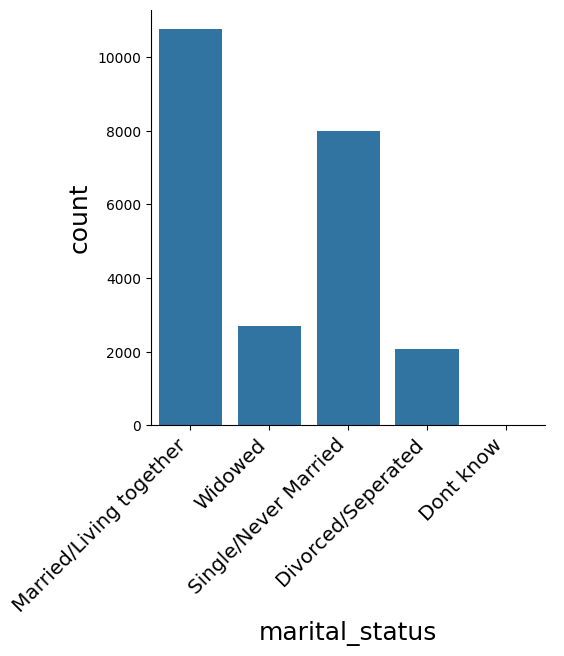

In [ ]:
sns.catplot(x="marital_status",kind="count",data=train)

plt.xticks(
    rotation=45,
    horizontalalignment="right",
    fontweight="light",
    fontsize="x-large"
)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

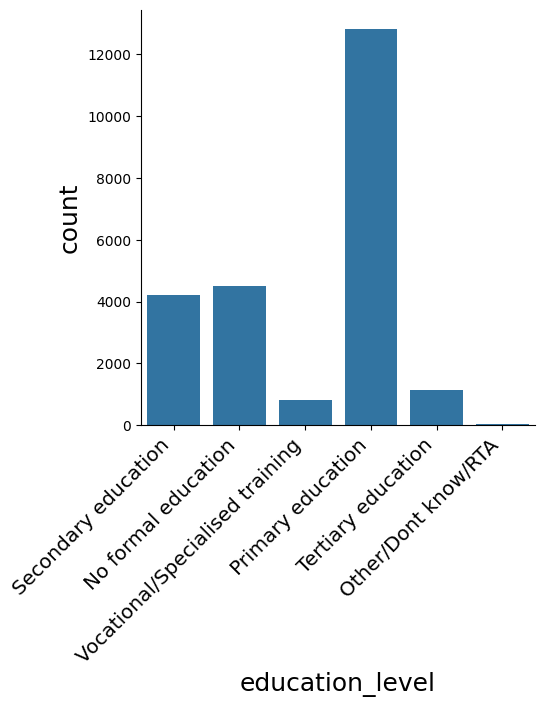

In [ ]:
sns.catplot(x="education_level",kind="count",data=train)

plt.xticks(
    rotation=45,
    horizontalalignment="right",
    fontweight="light",
    fontsize="x-large"
)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

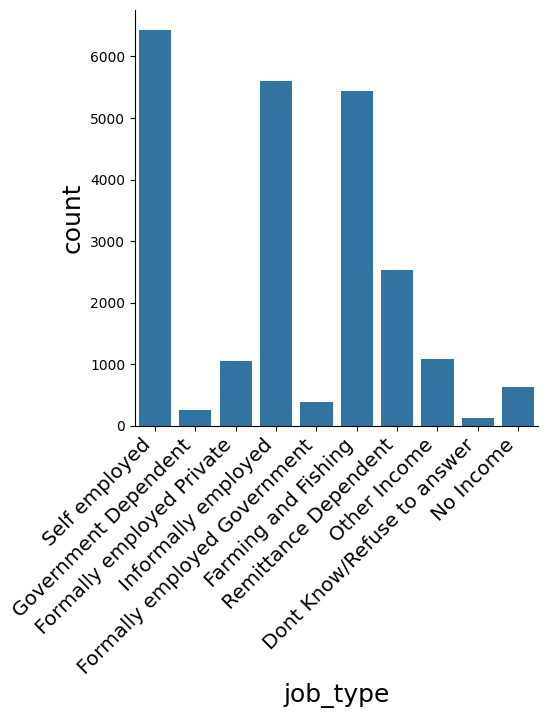

In [ ]:
sns.catplot(x="job_type",kind="count",data=train)

plt.xticks(
    rotation=45,
    horizontalalignment="right",
    fontweight="light",
    fontsize="x-large"
)

Text(0.5, 0, 'household size')

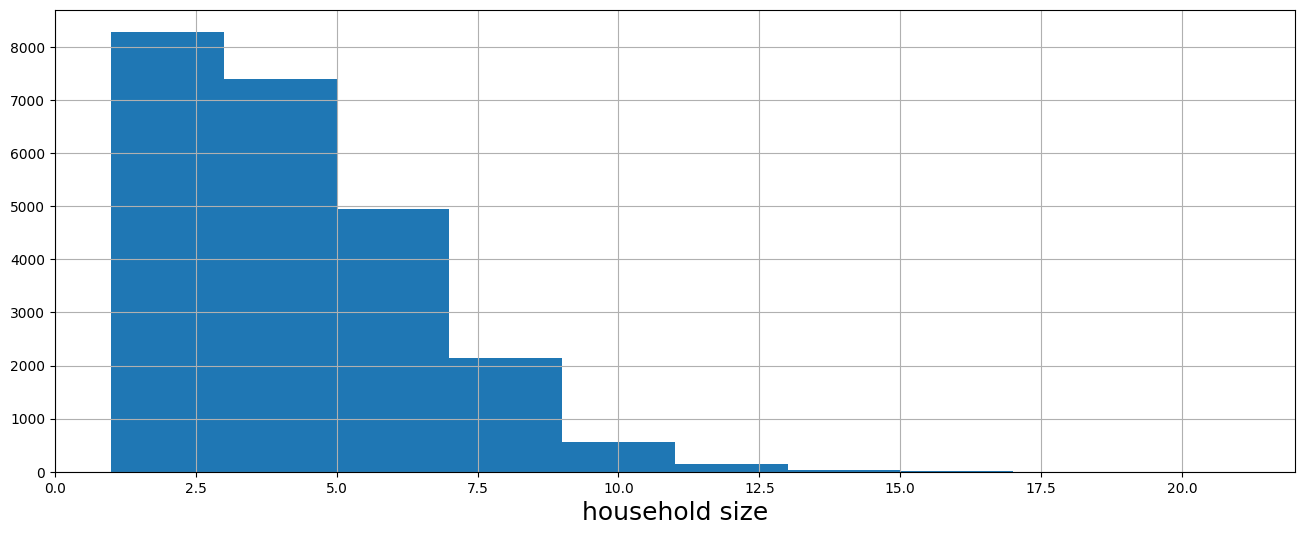

In [ ]:
plt.figure(figsize=(16,6))
train.household_size.hist()
plt.xlabel("household size")

([0, 1], [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x600 with 0 Axes>

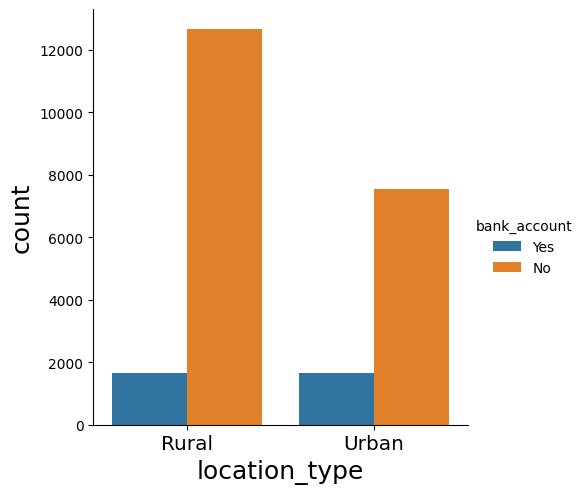

In [ ]:
plt.figure(figsize=(16,6))
sns.catplot(x="location_type",hue="bank_account",kind="count",data=train)
plt.xticks(
fontweight="light",
fontsize="x-large"
)

([0, 1], [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x600 with 0 Axes>

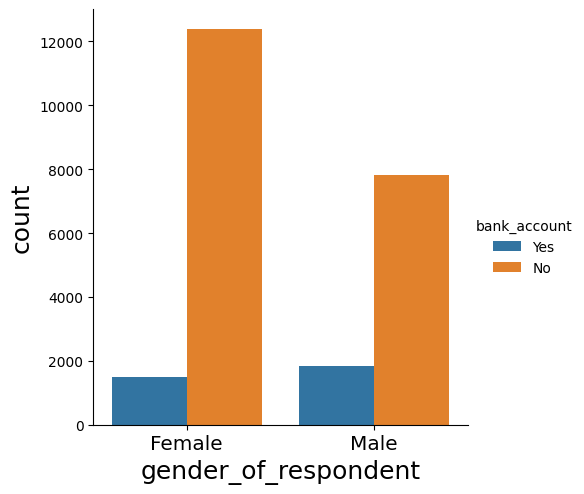

In [ ]:
plt.figure(figsize=(16,6))
sns.catplot(x="gender_of_respondent",hue="bank_account",kind="count",data=train)
plt.xticks(
fontweight="light",
fontsize="x-large"
)

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

le=LabelEncoder()
train['bank_account']=le.fit_transform(train['bank_account'])
X_train=train.drop(['bank_account'],axis=1)
y_train=train['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64


import sklearn.model_selection

In [49]:
# preprocess the train data 
processed_train = preprocessing_data(X_train)
processed_test = preprocessing_data(test)

In [50]:
import sklearn.model_selection

In [51]:
from sklearn.model_selection import train_test_split
X_train, x_val, y_train, y_val =train_test_split(
   processed_train, y_train, stratify= y_train,
   test_size=28, random_state=42 
)

In [52]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data                  

In [53]:
print(processed_train[:2])

[[1.         0.         1.         0.1        0.0952381  0.
  0.         0.         0.         0.         0.         1.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         1.         0.         0.
  0.        ]
 [1.         0.         0.         0.2        0.64285714 0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         1.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.        ]]


In [54]:
print(processed_train.shape)

(23524, 37)


In [55]:
import sklearn.model_selection

In [56]:

from xgboost import XGBClassifier
xg_model = XGBClassifier()
xg_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

NameError: name 'X_Val' is not defined

In [58]:
test.bank_account = xg_model.predict(processed_test)

In [59]:
submission = pd.DataFrame({
    "uniqueid": test["uniqueid"] + "x" + test["country"],
    "bank_account": test.bank_account})

In [60]:
submission.sample(15)

,uniqueid,bank_account
5538,uniqueid_11673xRwanda,0
9500,uniqueid_2417xUganda,0
535,uniqueid_6604xKenya,0
2452,uniqueid_8521xKenya,0
5696,uniqueid_11831xRwanda,0
1129,uniqueid_7198xKenya,0
5964,uniqueid_12099xRwanda,1
5152,uniqueid_11287xRwanda,0
9868,uniqueid_2785xUganda,0
3214,uniqueid_9349xRwanda,0


In [61]:
from IPython.display import FileLink
submission.to_csv('submission1.csv',index=False)

In [62]:
from IPython.display import FileLink
submission.to_csv('submission1.xlsx',index=False)